# Regional drought

The USDM keeps statistics on the percentage of drought in different major climatic regions of the contiguous United States. 
This is a large enough area that the drought data doesn't just immediately jump from zero to 100%. 

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

We consider comprehensive statistics -- that is the percentage (of land area) that each climate region is in the D0-D4 drought categories.

## Overview of the data 

In [5]:
dm_data= pd.read_csv("../Data/climate_region_comprehensive_D0_through_D4.csv")
dm_data

,MapDate,Region,None,D0,D1,D2,D3,D4,ValidStart,ValidEnd,StatisticFormatID
0,20231010,High Plains,57.12,42.88,27.48,15.26,5.44,0.97,2023-10-10,2023-10-16,1
1,20231010,Midwest,16.15,83.85,55.51,21.95,6.14,0.35,2023-10-10,2023-10-16,1
2,20231010,Northeast,83.24,16.76,2.47,0.27,0.00,0.00,2023-10-10,2023-10-16,1
3,20231010,South,15.63,84.37,66.02,48.72,27.77,11.61,2023-10-10,2023-10-16,1
4,20231010,Southeast,40.27,59.73,27.26,8.68,1.26,0.00,2023-10-10,2023-10-16,1
...,...,...,...,...,...,...,...,...,...,...,...
7441,20000104,Midwest,26.35,73.65,41.30,7.29,0.00,0.00,2000-01-04,2000-01-10,1
7442,20000104,Northeast,92.83,7.17,2.58,0.00,0.00,0.00,2000-01-04,2000-01-10,1
7443,20000104,South,14.90,85.10,57.90,30.74,0.00,0.00,2000-01-04,2000-01-10,1
7444,20000104,Southeast,28.58,71.42,42.59,19.20,0.00,0.00,2000-01-04,2000-01-10,1


In [6]:
regions = set(dm_data["Region"])
regions

{'High Plains', 'Midwest', 'Northeast', 'South', 'Southeast', 'West'}

### Visualization of drought data from different counties

Before training our model, we look at what this data looks like from different climate regions in the U.S. 

In [8]:
def get_region(region_name):
    return dm_data.loc[dm_data["Region"] == region_name][::-1] # make in chronological order

In [11]:
def plot_region(region_name):
    region = get_region(region_name)

    fig, axs = plt.subplots(1,1,sharex=True,sharey=True,figsize=(15,5))
    axs.fill_between(x=region["ValidEnd"],y1=0,y2=region["D0"],color="k",alpha=0.1,label="D0")
    axs.fill_between(x=region["ValidEnd"],y1=0,y2=region["D1"],color="k",alpha=0.3,label="D1")
    axs.fill_between(x=region["ValidEnd"],y1=0,y2=region["D2"],color="k",alpha=0.5,label="D2")
    axs.fill_between(x=region["ValidEnd"],y1=0,y2=region["D3"],color="k",alpha=0.7,label="D3")
    axs.fill_between(x=region["ValidEnd"],y1=0,y2=region["D4"],color="k",alpha=0.9,label="D4")
    axs.set_xticks(axs.get_xticks()[::156])
    axs.set_xlabel("Date") 
    axs.set_ylabel("Percentage in drought")
    axs.legend()
    fig.suptitle(region_name)

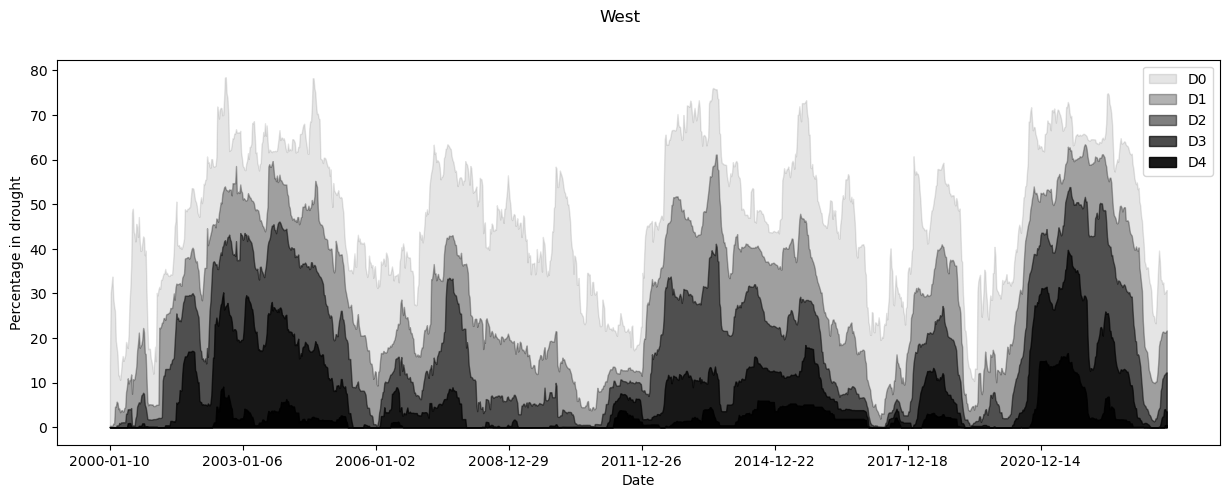

In [13]:
plot_region("West")plot_region("West")

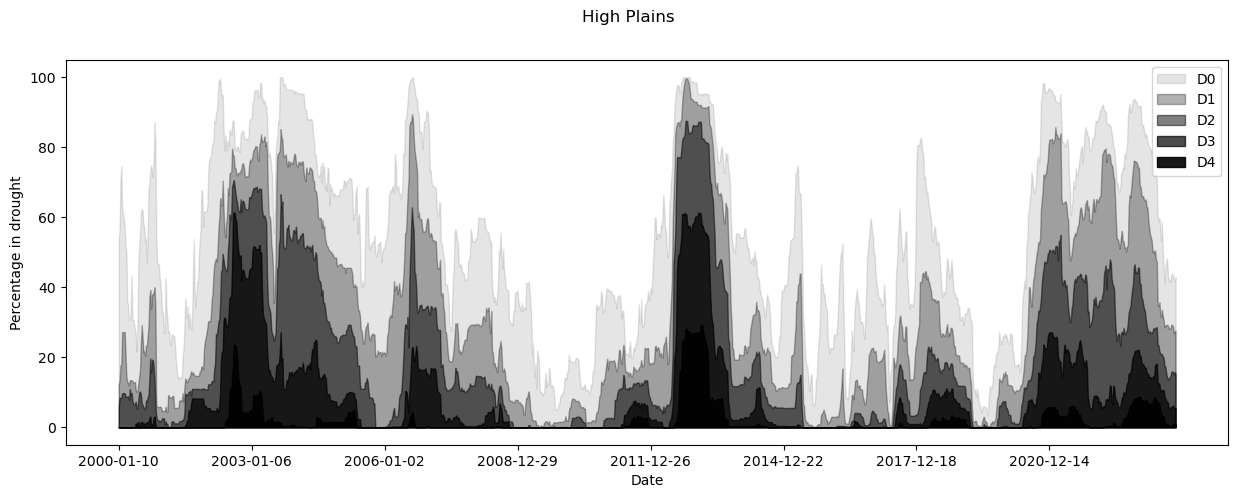

In [14]:
plot_region("High Plains")

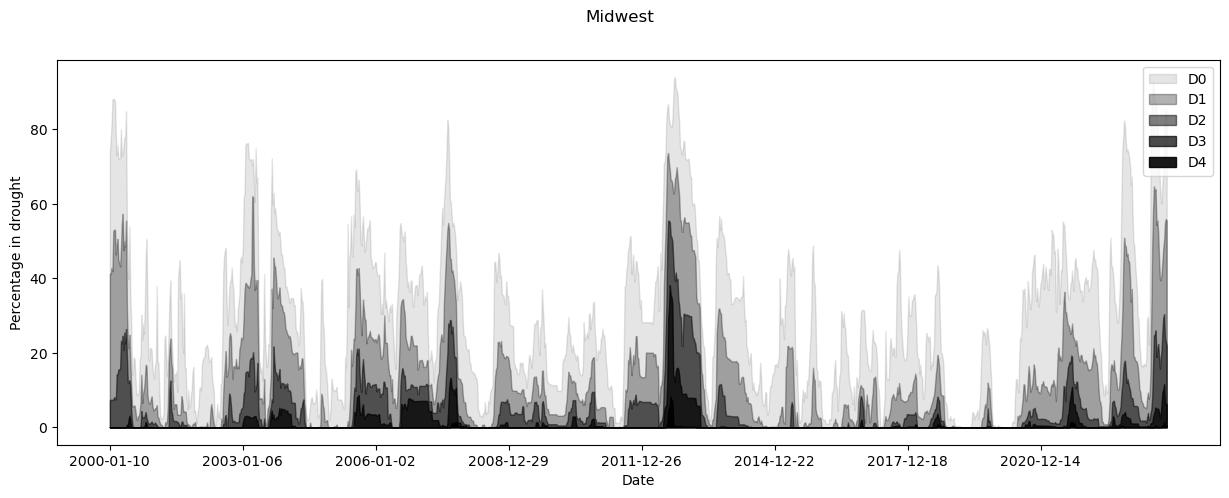

In [18]:
plot_region("Midwest")

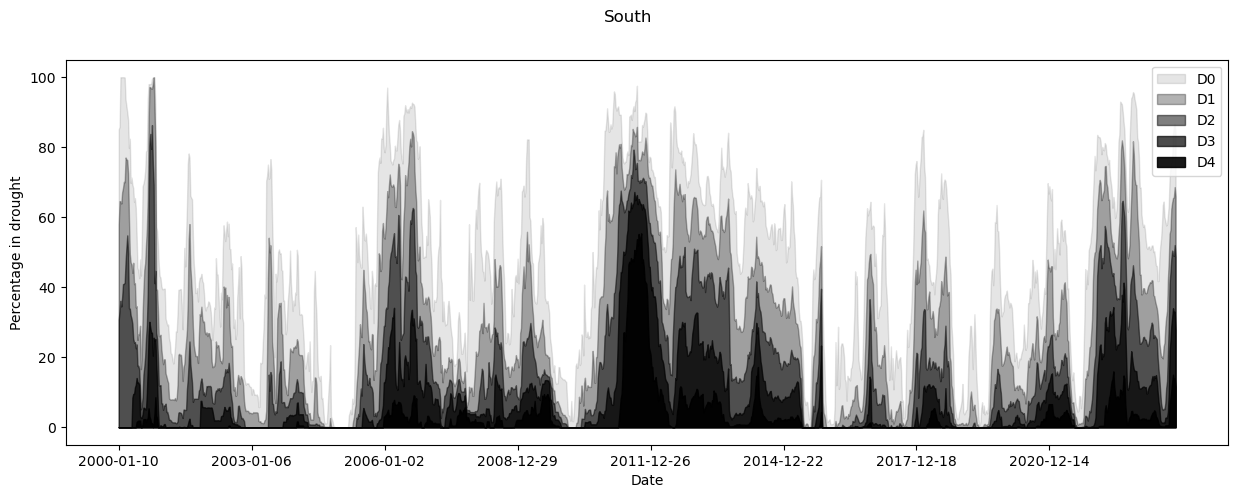

In [19]:
plot_region("South")

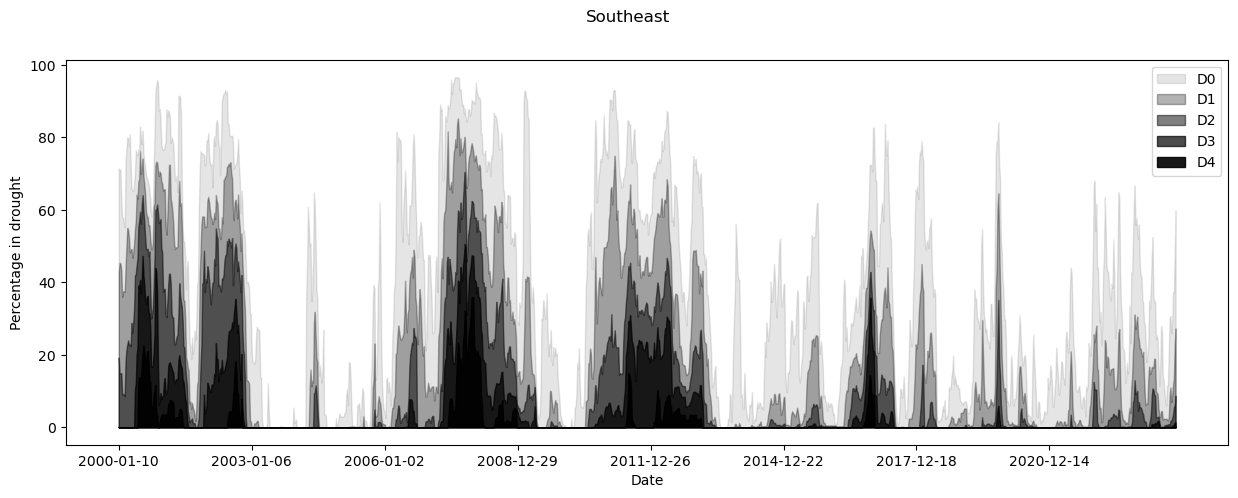

In [20]:
plot_region("Southeast")

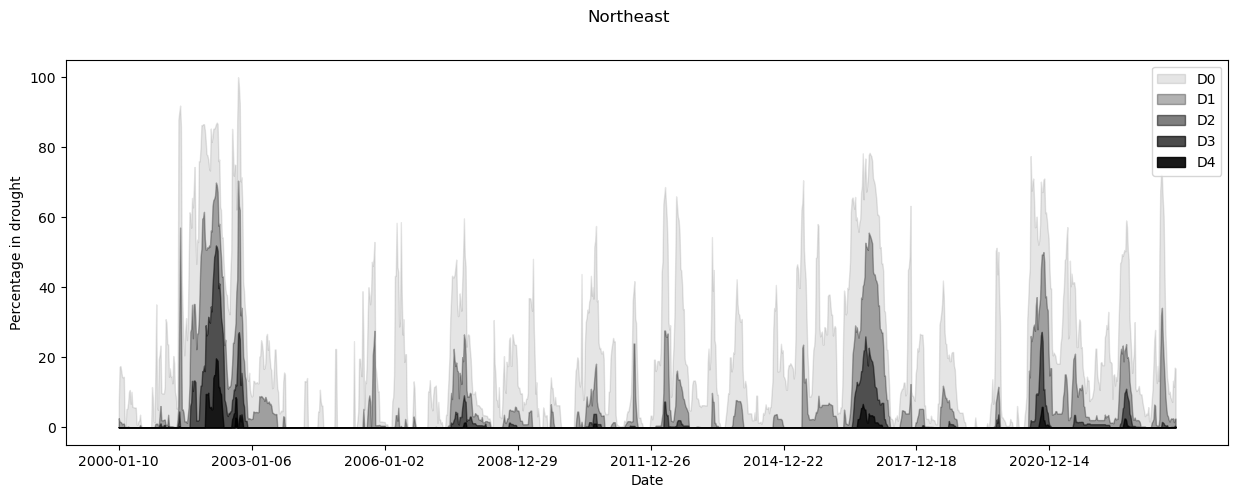

In [21]:
plot_region("Northeast")

### Summary statistics

Our main takeaway from this qualitative analysis is that drought appears to have been much more extensive and severe in the West/High Plains of the U.S., while drought has been least common in the northeast. 
We can see this a different way by considering the mean and standard deviations of the different drought levels.

In [71]:
for region in regions:
    print(f"Mean drought of {region}:")
    print(f"\t D0: {np.mean(get_region(region)['D0']):.4f} +/- {np.std(get_region(region)['D0']):.2f}")
    print(f"\t D1: {np.mean(get_region(region)['D1']):.4f} +/- {np.std(get_region(region)['D1']):.2f}")
    print(f"\t D2: {np.mean(get_region(region)['D2']):.4f} +/- {np.std(get_region(region)['D2']):.2f}")
    print(f"\t D3: {np.mean(get_region(region)['D3']):.4f} +/- {np.std(get_region(region)['D3']):.2f}")
    print(f"\t D4: {np.mean(get_region(region)['D4']):.4f} +/- {np.std(get_region(region)['D4']):.2f}")

Mean drought of High Plains:
	 D0: 54.4743 +/- 26.79
	 D1: 34.3974 +/- 26.74
	 D2: 20.2624 +/- 21.57
	 D3: 8.9396 +/- 13.60
	 D4: 1.8907 +/- 4.80
Mean drought of Midwest:
	 D0: 29.4902 +/- 21.20
	 D1: 13.6443 +/- 15.12
	 D2: 4.8602 +/- 7.85
	 D3: 1.2314 +/- 3.33
	 D4: 0.0552 +/- 0.46
Mean drought of West:
	 D0: 47.8946 +/- 15.61
	 D1: 30.6061 +/- 16.51
	 D2: 18.9620 +/- 14.58
	 D3: 8.4200 +/- 9.15
	 D4: 1.8778 +/- 3.11
Mean drought of South:
	 D0: 47.2636 +/- 25.78
	 D1: 30.5705 +/- 23.22
	 D2: 17.8956 +/- 18.12
	 D3: 8.5366 +/- 12.27
	 D4: 2.8582 +/- 7.33
Mean drought of Southeast:
	 D0: 39.2310 +/- 29.43
	 D1: 21.4408 +/- 23.92
	 D2: 11.2094 +/- 16.72
	 D3: 5.0416 +/- 9.92
	 D4: 1.4285 +/- 4.48
Mean drought of Northeast:
	 D0: 21.0219 +/- 22.17
	 D1: 6.6900 +/- 12.76
	 D2: 1.8622 +/- 6.12
	 D3: 0.3138 +/- 1.64
	 D4: 0.0042 +/- 0.10


# Training a recurrent neural network

We would like to give some function a timestream of data that lists the percentage of D0-D4 for a county, and for that function to predict for us the percentages of D0-D4 one week from now. As we are dealing with a time stream, a recurrent neural network seems most appropriate.

In [99]:
import torch
import torch.nn as nn

In [126]:
def input_data(seq,ws):
    out = []
    L = len(seq)
    
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    
    return out

In [127]:
class LSTM(nn.Module):
    
    def __init__(self, input_size = 1, hidden_size = 50, out_size = 1):
        super().__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size,out_size)
        self.hidden = (torch.zeros(1,1,hidden_size),torch.zeros(1,1,hidden_size))
    
    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(seq.view(len(seq),1,-1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]

### Train on a specific region

We train on a specific region and drought category.

In [128]:
torch.manual_seed(42)
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [129]:
def get_region_train_test(region_name, category, train_size, window_size):
    region = get_region(region_name)
    train = region[category][:train_size]
    test  = region[category][train_size:]
    train = input_data(train, window_size)
    return train, test

In [130]:
train, test = get_region_train_test("West", "D0", 1000, 40)

In [135]:
epochs = 1
future = 40

for i in range(epochs):
    
    for seq, y_train in train:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))

        y_pred = model(seq)
        #loss = criterion(y_pred, y_train)
        #loss.backward()
        #optimizer.step()
        
    #print(f"Epoch {i} Loss: {loss.item()}")
    
    #preds = train_set[-window_size:].tolist()
    #for f in range(future):
    #    seq = torch.FloatTensor(preds[-window_size:])
    #    with torch.no_grad():
    #        model.hidden = (torch.zeros(1,1,model.hidden_size),
    #                        torch.zeros(1,1,model.hidden_size))
    #        preds.append(model(seq).item())
        
    #loss = criterion(torch.tensor(preds[-window_size:]), y[760:])
    #print(f"Performance on test range: {loss}")

TypeError: Series.view() takes from 1 to 2 positional arguments but 4 were given